In [1]:
import ROOT
import numpy as np
import scipy
import matplotlib.pyplot as plt
from array import array

In [2]:
c = 299792458*1e3 ##speed light in mm/sec

In [3]:
def intersect_time(rX_mag,X_th,X_ph,q_th,q_ph,radius,length):
    if((rX_mag*rX_mag*np.sin(X_th)*np.sin(X_th) >= radius*radius) or (rX_mag*np.cos(X_th) >= length/2) or ((rX_mag*np.cos(X_th)) <= -length/2)): 
        return -1000
    else:
        a = c*c*np.sin(q_th)*np.sin(q_th)
        b = 2*c*(np.sin(q_th)*np.cos(q_ph)*rX_mag*np.cos(X_ph)*np.sin(X_th)+np.sin(q_th)*np.sin(q_ph)*rX_mag*np.sin(X_ph)*np.sin(X_th))
        d = rX_mag*rX_mag*np.sin(X_th)*np.sin(X_th)-radius*radius
        t1 = (-b + np.sqrt(b*b-4*a*d))/(2*a)
        t2 = (length/2 - rX_mag*np.cos(X_th))/(c*np.cos(q_th))
        t3 = (-length/2 - rX_mag*np.cos(X_th))/(c*np.cos(q_th))
        return min(t1,max(t2,t3))

In [19]:
def time_delay(intersect_t,rX_mag,X_th,X_ph,q_th,q_ph,t):
    if (intersect_t<0): 
        return -1000
    else:
        inter_dist = np.sqrt(rX_mag*rX_mag + intersect_t*intersect_t*c*c + 2*c*intersect_t*(rX_mag*np.cos(X_th)*np.cos(q_th)+rX_mag*np.cos(X_ph)*np.sin(X_th) * np.cos(q_ph)*np.sin(q_th)+rX_mag*np.sin(X_ph)*np.sin(X_th)*np.sin(q_ph)*np.sin(q_th)))
        dt = intersect_t + t - inter_dist/c
        return dt

In [5]:
file_path = "../pythia8314/examples/first_attempt_500mm.root"

In [6]:
t1=ROOT.TChain("t1")
t1.AddFile(file_path)

1

In [7]:
t2=ROOT.TChain("t1")
t2.AddFile(file_path)

1

In [8]:
ientry = t1.GetEntries()

In [9]:
final_higgs_energy = []
final_higgs_x = []
final_higgs_y = []
final_higgs_z = []
final_higgs_theta = []
final_higgs_phi = []
final_higgs_t = []

In [10]:
final_zb_energy = []
final_zb_x = []
final_zb_y = []
final_zb_z = []
final_zb_theta = []
final_zb_phi = []
final_zb_t = []

In [11]:
for jentry in range(0,ientry):
    t1.GetEntry(jentry)
    if(t1.pid==25):
        if(len(t1.MotherList)==1): continue
        dl = np.unique(t1.DaughterListRec)
        pos = t1.list
        for i in range(0,len(dl)):
            t2.GetEntry(jentry-pos+int(dl[i]))
            if(t2.isFinal==0): continue
            final_higgs_energy.append(t2.energy)
            final_higgs_x.append(t2.x)
            final_higgs_y.append(t2.y)
            final_higgs_z.append(t2.z)
            final_higgs_theta.append(t2.theta)
            final_higgs_phi.append(t2.phi)
            final_higgs_t.append(t2.t)


In [12]:
for jentry in range(0,ientry):
    t1.GetEntry(jentry)
    if(t1.pid==23):
        if(len(t1.MotherList)==1): continue
        dl = np.unique(t1.DaughterListRec)
        pos = t1.list
        for i in range(0,len(dl)):
            t2.GetEntry(jentry-pos+int(dl[i]))
            if(t2.isFinal==0): continue
            final_zb_energy.append(t2.energy)
            final_zb_x.append(t2.x)
            final_zb_y.append(t2.y)
            final_zb_z.append(t2.z)
            final_zb_theta.append(t2.theta)
            final_zb_phi.append(t2.phi)
            final_zb_t.append(t2.t)

In [13]:
len_higgs = len(final_higgs_x)
len_zb = len(final_zb_x)

In [14]:
len_zb

746728

In [15]:
final_higgs_r = []
final_higgs_pos_th = []
final_higgs_pos_ph = []
final_zb_r = []
final_zb_pos_th = []
final_zb_pos_ph = []

In [32]:
final_higgs_t_diff=[]
final_zb_t_diff=[]

In [17]:
for i in range(0,len_higgs):
    rad = np.sqrt(final_higgs_x[i]**2+final_higgs_y[i]**2+final_higgs_z[i]**2)
    final_higgs_r.append(rad)
    final_higgs_pos_th.append(np.acos(final_higgs_z[i]/rad))
    final_higgs_pos_ph.append(np.atan2(final_higgs_y[i],final_higgs_x[i]))


In [18]:
for i in range(0,len_zb):
    rad = np.sqrt(final_zb_x[i]**2+final_zb_y[i]**2+final_zb_z[i]**2)
    final_zb_r.append(rad)
    final_zb_pos_th.append(np.acos(final_zb_z[i]/rad))
    final_zb_pos_ph.append(np.atan2(final_zb_y[i],final_zb_x[i]))


In [21]:
intersect_time?

Signature: intersect_time(rX_mag, X_th, X_ph, q_th, q_ph, radius, length)
Docstring: <no docstring>
File:      /var/folders/6m/b8zf0w9j2_q2whjl77mrgq300000gn/T/ipykernel_10864/3753062624.py
Type:      function

In [25]:
intersect_t = intersect_time(final_higgs_r[0],final_higgs_pos_th[0],final_higgs_pos_ph[0],final_higgs_theta[0],final_higgs_phi[0],2100,4400)

In [24]:
final_higgs_t[0]/(c)

3.496570224721915e-09

In [31]:
time_delay(intersect_t,final_higgs_r[0],final_higgs_pos_th[0],final_higgs_pos_ph[0],final_higgs_theta[0],final_higgs_phi[0],final_higgs_t[0]/c)

np.float64(1.6281707720619711e-09)

In [33]:
for i in range(0,len_higgs):
    int_t = intersect_time(final_higgs_r[i],final_higgs_pos_th[i],final_higgs_pos_ph[i],final_higgs_theta[i],final_higgs_phi[i],2100,4400)
    final_higgs_t_diff.append(time_delay(int_t,final_higgs_r[i],final_higgs_pos_th[i],final_higgs_pos_ph[i],final_higgs_theta[i],final_higgs_phi[i],final_higgs_t[i]/c))
    

In [35]:
for i in range(0,len_zb):
    int_t = intersect_time(final_zb_r[i],final_zb_pos_th[i],final_zb_pos_ph[i],final_zb_theta[i],final_zb_phi[i],2100,4400)
    final_zb_t_diff.append(time_delay(int_t,final_zb_r[i],final_zb_pos_th[i],final_zb_pos_ph[i],final_zb_theta[i],final_zb_phi[i],final_zb_t[i]/c))

In [42]:
higgs_t_pass_cut = []
zb_t_pass_cut = []

In [43]:
for i in range(0,len_higgs):
    if(final_higgs_t_diff[i]<0.): continue
    higgs_t_pass_cut.append(final_higgs_t_diff[i]*1e9)

In [45]:
for i in range(0,len_zb):
    if(final_zb_t_diff[i]<0.): continue
    zb_t_pass_cut.append(final_zb_t_diff[i]*1e9)

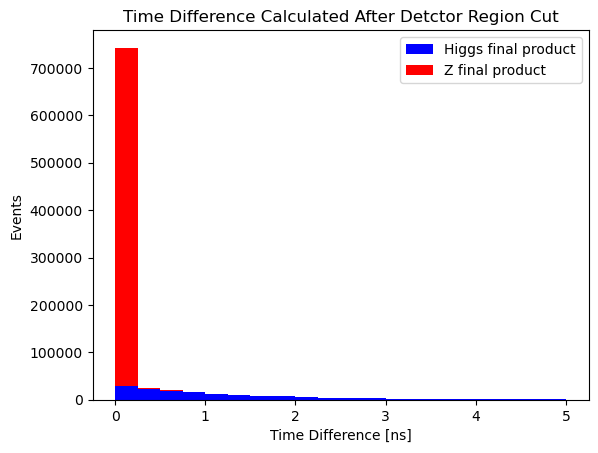

In [48]:
data = [higgs_t_pass_cut,zb_t_pass_cut]
colors = ["blue","red"]
labels = ["Higgs final product","Z final product"]
plt.hist(data,stacked = True,bins=20,range = [0,5],color = colors, label = labels)
plt.title("Time Difference Calculated After Detctor Region Cut")
plt.xlabel("Time Difference [ns]")
plt.ylabel("Events")
plt.legend()
plt.savefig("time_dif.pdf")

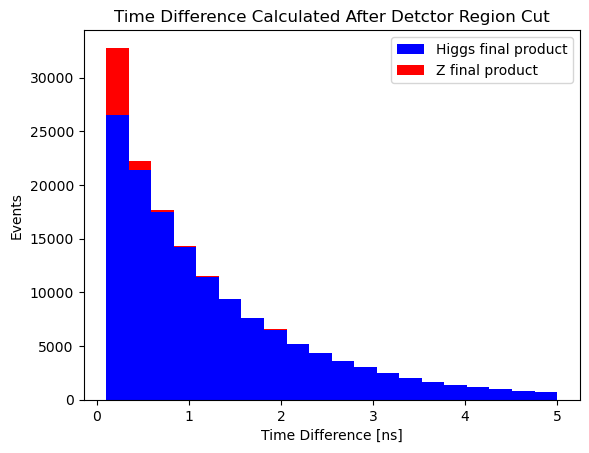

In [49]:
data = [higgs_t_pass_cut,zb_t_pass_cut]
colors = ["blue","red"]
labels = ["Higgs final product","Z final product"]
plt.hist(data,stacked = True,bins=20,range = [0.1,5],color = colors, label = labels)
plt.title("Time Difference Calculated After Detctor Region Cut")
plt.xlabel("Time Difference [ns]")
plt.ylabel("Events")
plt.legend()
plt.savefig("time_dif_zoomed.pdf")